# Projet numérique : lignes de niveau

## Introduction

Soit f une fonction de deux variables et à valeurs réelles (supposée continûment différentiable). On souhaite déterminer les ensembles de la forme :
        $\{(x, y)\in\mathbb{R^2}, f(x,y) = c\}$  où  $c\in\mathbb{R}$

La représentation graphique de cet ensemble sera donc des courbes dans le plan $(x,y)$.

### Nous allons procéder par étape :
- Nous nous limeterons dans un premier temps à des fonctions de $[0,1]*[0,1]$ dans $\mathbb{R}$ et nous ne considérerons que les lignes de niveau passant par l'arrête gauche du carré $[0,1]*[0,1]$
- Dans un second temps, nous étudierons les lignes de niveau d'une fonction de $[a,b]*[c,d]$ dans $\mathbb{R}$

## Partie I : élaboration de la fonction find_seed

La fonction $\textit{find_seed}$ a pour but de trouver un $y \in[0,1]$ tel que : $f(0, y) = c$. 
Comme $f$ est supposée continue, $\textbf{le théorème des valeurs intermédiaires}$ nous donne la condition suffisante sur c pour qu'un tel y existe :
$(f(0,0) \leq c \leq f(0,1))$   ou   $(f(0,1) \leq c \leq f(0,0))$

Dans la suite nous nous limiterons aux valeurs de c vérifiant cette condition et nous appellerons t la valeur recherchée. Nous sommes conscients que cette condition est forte et que nous risquons de "rater" des lignes de niveau.

Pour implémenter la fonction $\textit{find_seed}$, nous avons préféré procéder par dichotomie plutôt qu'utiliser la méthode de Newton car la condition d'arrêt porte sur la précision de $\mid y - t\mid$ et non $\mid(0,y) - f(0,t)\mid$. Le nombre d'itérations de la fonction est constant et vaut $1-\log_2{(eps)}$, où eps est la précision souhaitée.

Afin de tester nos fonctions, nous utiliserons la fonction $\textit{fct_test}$ choisie arbitrairement.

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def fct_test(x, y) :
    return (x - 0.2)**2 + (y - 0.2)**2 - 0.3  #fonction quadratique, ses lignes de niveau sont des cercles

def grad(f, x0, y0, h = 10**(-10)) :  # fonction gradient faite à la main car le module autograd n'existe pas sur
    # le notebook
    d_x = (f(x0 + h, y0) - f(x0, y0)) / h
    d_y = (f(x0, y0 + h) - f(x0, y0)) / h
    return [d_x, d_y]

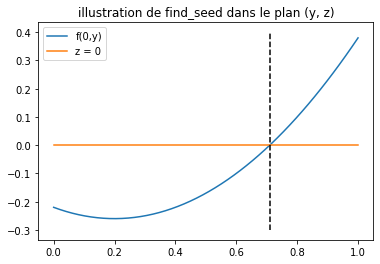

t =  0.7099019549787045


In [5]:
def find_seed(f, c=0., eps=2**(-26)) :
    ''' Fonction procédant par dichotomie visant à trouver l'ordonnée du point d'intersection 
    entre l'arrête gauche et une ligne de niveau de valeur c'''
    a, b = 0, 1
    if (f(0, 0) - c)*(f(0, 1) - c) > 0 :
        return None
    else :
        while abs(a-b) >= eps :
            z = (b+a)/2
            if (f(0, a) - c)*(f(0, z)-c) <= 0 :
                b = z
            else :
                a = z
        return (b+a)/2

L_0 = 50*[0]
L_x = np.linspace(0, 1, 50)
L_y = [fct_test(0, t) for t in L_x]
plt.plot(L_x, L_y, label = 'f(0,y)')
plt.plot(L_x, L_0, label = 'z = 0')
plt.legend()
plt.title('illustration de find_seed dans le plan (y, z)')
x1 = 50*[find_seed(fct_test, 0)]
y1 = np.linspace(-0.3, 0.4, 50)
plt.plot(x1, y1, '--', c = 'black')
plt.show()
print('t = ', find_seed(fct_test, 0))

## Partie II : élaboration naïve de simple_contour (méthode des tangentes)

La tangente à une ligne de niveau en $(x_0,y_0)$ est à la fois contenue dans le plan tangent et perpendiculaire au gradient en $(x_0,y_0)$.

Ces deux conditions correspondent à l'intersection de deux plans (i.e une droite) d'équation :
$ y - y_0 = - \frac{\partial_x{f}(x_0,y_0)}{\partial_y{f}(x_0,y_0)} * (x - x_0)$

Le cas $\partial_y{f}(x_0,y_0) \sim 0$ sera bien évidemment traité dans l'algorithme.

$\textit{remarque : le coefficient directeur de la tangente est directement donné par le théorème des fonctions implicites} : y = \psi(x)  $,   avec   $  d\psi = - \frac{\partial_x{f}(x,y)}{\partial_y{f}(x,y)}$

Nous allons donc procéder de proche en proche en approximant la courbe à l'ordre 1.

Afin de passer du point $M_n$ au point $M_{n+1}$, nous avons fixé la condition $d(M_n, M_{n+1}) = \delta$ , soit :
$(y_{n+1} - y_n)^2 + (x_{n+1} - x_n)^2 = \delta ^2$

Cette condition fournit finalement deux points possibles, placés sur la tangente de part et d'autre de $M_n$. La fonction $\textit{prochain_point}$ renvoie un des deux points possibles :

In [8]:
def prochain_point(f, x0, y0, delta = 0.01, eps2 = 2**(-10)) :
    ''' Choisit un des 2 points situés à delta de (x0, y0) et sur la tangente '''
    if abs(grad(f, x0, y0)[1]) < abs(grad(f, x0, y0)[0])*eps2 :  # on traite le cas où la tangente est verticale dans le plan(x, y)
        return [x0, delta + y0]
    else :
        a = - grad(f, x0, y0)[0] / grad(f, x0, y0)[1]
        # coef directeur de la tangente à la ligne de niveau en (x0, y0)
        X = delta / (1 + a**2)**0.5  # X = x - x0
        Y = a * X
        return [X + x0, Y + y0]

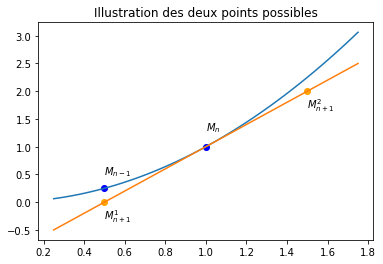

In [18]:
L_x = np.linspace(0.25, 1.75, 50)
L_y1 = [t**2 for t in L_x]  # courbe de f(x) == x**2
L_y2 = [2*t - 1 for t in L_x]  # tangente
plt.plot(L_x, L_y1)
plt.plot(L_x, L_y2)
plt.scatter(1, 1, c = 'blue')
plt.text(1, 1.3, '$M_n$')
plt.scatter(0.5, 0.25, c = 'blue')
plt.text(0.5, 0.5, '$M_{n-1}$')
plt.scatter(1.5, 2, c = 'orange')
plt.text(0.5, -0.3, '$M^1_{n+1}$')
plt.scatter(0.5, 0, c = 'orange')
plt.text(1.5, 1.7, '$M^2_{n+1}$')
plt.title('Illustration des deux points possibles')
plt.show()

Ici, il convient de choisir $M^2_{n+1}$ car il est dans le sens de la progression du tracé.

Nous allons choisir le point le plus éloigné du point $M_{n-1}$ afin qu'il y ait une progression dans le tracé de la ligne de niveau. C'est le rôle de la fonction $\textit{point_le_plus_loin}$ :

In [12]:
def point_le_plus_loin(P, x, y):
    '''renvoit le point le plus éloigné de l'avant dernier élément de la liste '''
    point_suivant1 = [P[0], P[1]]
    point_suivant2 = [2*x[-1] - P[0], 2*y[-1] - P[1]]
    d1 = (point_suivant1[0] - x[-2])**2 + (point_suivant1[1] - y[-2])**2
    d2 = (point_suivant2[0] - x[-2])**2 + (point_suivant2[1] - y[-2])**2
    if d1 < d2:
        return point_suivant2
    else:
        return point_suivant1

Enfin, une des conditions d'arrêt du tracé sera la sortie du domaine de définition de la fonction. La fonction $\textit{dans_le_domaine}$ renvoie True si le point appartient au domaine de définition, False sinon :

In [13]:
# Domaine de définition : [xmin, xmax] * [ymin, ymax] de simple_contour
xmin, xmax = 0, 1
ymin, ymax = 0, 1

def dans_le_domaine(x0, y0) :
    ''' Test si le point (a, b) est dans le domaine de définition '''
    if x0 > xmax or x0 < xmin or y0 > ymax or y0 < ymin :
        return False
    else :
        return True

On peut finalement implémenter la fonction $\textit{simple_contour}$ comme suit :

In [63]:
def simple_contour(f, c = 0.0, delta = 0.01) :
    ''' Tracé d'une ligne de niveau, traversant l'arrête gauche du carré [0, 1]*[0, 1] '''
    res_x = []  # Liste des abscisses
    res_y = []  # Liste des ordonnées
    compteur = 0  # Limite le nombre d'exécution
    if not(isinstance(find_seed(f, c), float)) :
        return res_x, res_y
    else :
        res_x.append(0.)
        res_y.append(find_seed(f, c))
        P = prochain_point(f, res_x[0], res_y[0], delta)
        if dans_le_domaine(P[0], P[1]) :
            res_x.append(P[0])
            res_y.append(P[1])
        elif dans_le_domaine(2*res_x[-1] - P[0], 2*res_y[-1] - P[1]) :
            res_x.append(2*res_x[-1] - P[0])
            res_y.append(2*res_y[-1] - P[1])
        else :
            return [], []
        while True :
            if not(dans_le_domaine(res_x[-1], res_y[-1])) :
                break
            elif compteur > 5000 :
                print('nombre itérations supérieur à 5000')
                break
            else :
                P = prochain_point(f, res_x[-1], res_y[-1], delta)
                # P devient un des 2 points possibles
                P1 = point_le_plus_loin(P, res_x, res_y)
                # P1 est le point pertinent (i.e. dans le sens de la progression)
                res_x.append(P1[0])
                res_y.append(P1[1])
                compteur += 1
    return res_x, res_y

Le problème de cette méthode est l'accumulation de l'erreur à chaque nouveau point. Ainsi, le tracé d'une ligne de niveau de $\textit{fct_test}$ (censée être un cercle) donne une spirale :

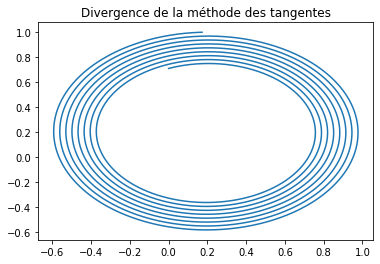

In [15]:
xmin, xmax = -1, 1
ymin, ymax = -1, 1

x, y = simple_contour(fct_test, 0)
plt.plot(x, y)
plt.title('Divergence de la méthode des tangentes')
plt.show()

Ceci est très problématique et ne remplit pas le cahier des charges ...

## Partie III : Correction de simple_contour avec la méthode de Newton

L'idée de l'algorithme est de se replacer sur la ligne de niveau à chaque nouveau point. Le point issu de l'approximation de la tangente est un point proche de la ligne de niveau, ainsi on peut utiliser la méthode de Newton sur une des coordonnées (x ou y), elle convergera toujours (si $\delta$ est assez petit).

Notre première idée était d'utiliser cette méthode toujours sur la variable y, c'est à dire partir du point issu de l'approximation de la tangente $(x_0,y_0)$ et d'appliquer Newton à la fonction : $g_{x_0}(y) = f(x_0, y)$ qui est bien une fonction à une seule variable.

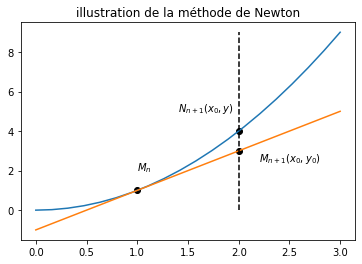

In [41]:
def fct_test_2(x):
    return x**2

x = np.linspace(0, 3, 20)
y1 = [fct_test_2(t) for t in x]
y2 = [2*t - 1 for t in x]
y = np.linspace(0, 9, 20)
x1 = 20*[2]
plt.scatter(1, 1, c = 'black')
plt.text(1, 2, '$M_n$')
plt.scatter(2, 3, c = 'black')
plt.text(2.2, 2.5, '$M_{n+1}(x_0,y_0)$')
plt.scatter(2, 4, c = 'black')
plt.text(1.4, 5, '$N_{n+1}(x_0,y)$')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x1, y, '--', c = 'black')
plt.title('illustration de la méthode de Newton')
plt.show()

Il peut néanmoins arriver que l'ordonnée recherchée n'existe pas, la méthode de Newton n'aboutit pas. Ainsi nous avons procédé à une disjonction de cas selon la pente de la tangente. Si celle-ci est faible (<1) il est préférable de rechercher un $y$ avec $x_0$ fixé. En revanche, si la pente est forte (>1), il est plus prudent de rechercher un $x$ avec $y_0$ fixé.

Nous avons donc défini ainsi la fonction Newton, qui prend en entrée un point issu de la méthode des tangentes et retourne un point sur la ligne de niveau, proche du point d'entrée :

In [42]:
def newton(f, P, c, eps = 2**(-48)) :
    '''Méthode de newton sur la verticale ou l'horizontale pour atteindre la ligne de niveau de valeur c, en partant du point P'''
    compteur = 20
    # On limite le nombre d'itérations à 20, la méthode de Newton converge très rapidement
    def g(x, y) :
        return f(x, y) - c
    pente = grad(g, P[0], P[1])[0] / grad(g, P[0], P[1])[1]  # pente de la tangente
    if abs(pente) < 1 :
        a = 1
    else :
        a = 0
    while abs(g(P[0], P[1])) > eps and compteur > 0:
        gradient = grad(g, P[0], P[1])[a]
        P[a] = P[a] - g(P[0], P[1])/gradient
        compteur -= 1
    return P

Finalement, la focntion simple_contour finale est : 

In [89]:
def simple_contour_newton(f, c = 0.0, delta = 0.01) :
    ''' Tracé d'une ligne de niveau, traversant l'arrête gauche du carré [0, 1]*[0, 1] '''
    res_x = []  # Liste des abscisses
    res_y = []  # Liste des ordonnées
    compteur = 0  # Limite le nombre d'exécution
    if not(isinstance(find_seed(f, c), float)) :
        return res_x, res_y
    else :
        res_x.append(0.)
        res_y.append(find_seed(f, c))
        P = prochain_point(f, res_x[0], res_y[0], delta)
        if dans_le_domaine(P[0], P[1]) :
            res_x.append(P[0])
            res_y.append(P[1])
        elif dans_le_domaine(2*res_x[-1] - P[0], 2*res_y[-1] - P[1]) :
            res_x.append(2*res_x[-1] - P[0])
            res_y.append(2*res_y[-1] - P[1])
        else :
            return [], []
        while True :
            if not(dans_le_domaine(res_x[-1], res_y[-1])) :
                break
            elif compteur > 5000 :
                print('nombre itérations supérieur à 5000')
                break
            else :
                P = prochain_point(f, res_x[-1], res_y[-1], delta)
                # P devient un des 2 points possibles
                P1 = point_le_plus_loin(P, res_x, res_y)
                # P1 est le point pertinent (i.e. dans le sens de la progression)
                P2 = newton(f, P1, c)
                # P2 est sur la ligne de niveau, dans le voisinnage de P1
                res_x.append(P2[0])
                res_y.append(P2[1])
                compteur += 1
    return res_x, res_y

Cette fois, cet algorithme donne bien un cercle plutôt qu'une spirale :

nombre itérations supérieur à 5000


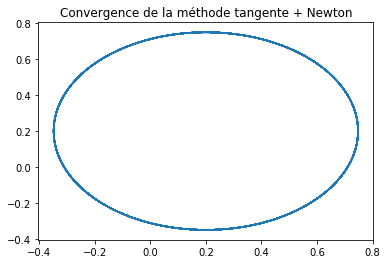

In [90]:
xmin, xmax = -1, 1
ymin, ymax = -1, 1

x, y = simple_contour_newton(fct_test, 0)
plt.plot(x, y)
plt.title('Convergence de la méthode tangente + Newton')
plt.show()

## Partie IV : Contour complexe

On se propose désormais d'étendre la méthode de $\textit{simple_contour}$ à une fonction de $[a,b]$ dans $[c,d]$.

Nous allons découper cette ensemble en cellules carrées $[xc[i],xc[i+1]]*[yc[i],yc[i+1]]$. L'idée est d'appliquer $\textit{simple_contour}$ à chacune de ces cellules afin d'obtenir des lignes de niveau sur l'ensemble de définition.

Tout d'abord, nous devons implémenter une fonction $\textit{find_seed_v2}$ qui ne sonde pas seulement l'arrête gauche du carré $[0,1]*[0,1]$ mais ses 4 arrêtes. Pour cela nous définissons des fonctions auxiliaires à f qui permettent de la faire "pivoter" dans le carré $[0,1]*[0,1]$ puis on utilise $\textit{find_seed}$ sur ces dernières :

In [54]:
def find_seed_v2(f, c=0, eps=2**(-26)) :
    ''' fonction find_seed_v2 qui cherche les intersections entre les 4 arrêtes et une ligne de niveau de valeur c, 
    en me servant de la première fonction dichotomique find_seed. Je crée des fonctions auxiliaires qui permettent 
    de "pivoter" la fonction principale afin de n'utiliser qu'une seule foction find_seed '''
    f2 = lambda x, y : f(y, x + 1) # arrête du haut
    f3 = lambda x, y : f(1 + x, y) # arrête de droite
    f4 = lambda x, y : f(y, x) # arrête du bas
    if isinstance(find_seed(f, c, eps), float) :
        return [0., find_seed(f, c, eps)]
    elif isinstance(find_seed(f2, c, eps), float) :
        return [find_seed(f2, c, eps), 1.]
    elif isinstance(find_seed(f3, c, eps), float) :
        return [1., find_seed(f3, c, eps)]
    elif isinstance(find_seed(f4, c, eps), float) :
        return [find_seed(f4, c, eps), 0.]
    else :
        return None

Enfin, pour chaque cellule $[xc[i],xc[i+1]]*[yc[i],yc[i+1]]$, il faut "normaliser" les points pour qu'ils se retrouvent dans $[0,1]*[0,1]$. On pourra alors appliquer $\textit{simple_contour}$. Il suffira ensuite de les "dénormaliser" afin qu'on ait à nouveau des points dans $[xc[i],xc[i+1]]*[yc[i],yc[i+1]]$.

si $x\in[xc[i],xc[i+1]]$, alors le $x'$ associé est : $x'= \frac{x-xc[i]}{xc[i+1]-xc[i]} \in [0,1]$

De même, pour dénormaliser : $x = x'*(xc[i+1] - xc[i]) + xc[i]$

On a donc l'algorithme suivant (avec $\textit{simple_contour}$ qui prend en compte $\textit{find_seed_v2}$) :

In [61]:
def simple_contour_v2(f, c = 0.0, delta = 0.01) :
    ''' Tracé d'une ligne de niveau, traversant l'une des arrêtes du carré [0, 1]*[0, 1] '''
    res_x = []  # Liste des abscisses
    res_y = []  # Liste des ordonnées
    compteur = 0  # Limite le nombre d'exécution
    if not(isinstance(find_seed_v2(f, c), list)) :
        return res_x, res_y
    else :
        res_x.append(find_seed_v2(f, c)[0])
        res_y.append(find_seed_v2(f, c)[1])
        P = prochain_point(f, res_x[0], res_y[0], delta)
        if dans_le_domaine(P[0], P[1]) :
            res_x.append(P[0])
            res_y.append(P[1])
        elif dans_le_domaine(2*res_x[-1] - P[0], 2*res_y[-1] - P[1]) :
            res_x.append(2*res_x[-1] - P[0])
            res_y.append(2*res_y[-1] - P[1])
        else : 
            return [], []
        while True :
            if not(dans_le_domaine(res_x[-1], res_y[-1])) :
                break
            elif compteur > 5000 :
                print('nombre itérations supérieur à 5000')
                break
            else :
                P = prochain_point(f, res_x[-1], res_y[-1], delta)
                # P devient un des 2 points possibles
                P1 = point_le_plus_loin(P, res_x, res_y)
                # P1 est le point pertinent (i.e. dans le sens de la progression)
                P2 = newton(f, P1, c)
                # P2 est sur la ligne de niveau c, dans le voisinage de P1
                res_x.append(P2[0])
                res_y.append(P2[1])
                compteur += 1
    return res_x, res_y

In [56]:
def contour(f, xc=[0.0, 1.0], yc=[0.0, 1.0], c=0.0, delta=0.01):
    n_x, n_y = len(xc)-1, len(yc)-1
    xs, ys = [], []
    for i in range(n_x):
        for j in range(n_y):
            g = lambda x, y: f(xc[i] + (xc[i+1]-xc[i])*x, yc[j] + (yc[j+1]-yc[j])*y)
            #On ramène l'ensemble de définition de la fonction à [0,1]*[0,1]
            Lint_x = [xc[i] + (xc[i+1]-xc[i])*x for x in simple_contour_v2(g, c, delta)[0]]
            #les points obtenus avec simple_contour_v2 sont dans [0,1]*[0,1], on les ramène dans leur intervalle d'origine
            Lint_y = [yc[j] + (yc[j+1]-yc[j])*y for y in simple_contour_v2(g, c, delta)[1]]
            xs.append(Lint_x)
            ys.append(Lint_y)
    return xs, ys

En prenant par exemple la fonction $f(x,y) = 2*(e^{-x^2-y^2} - e^{-(x-1)^2-(y-1)^2})$

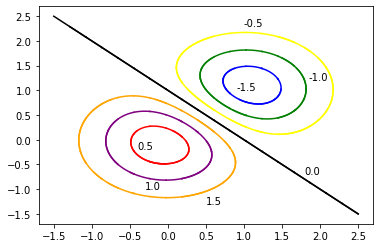

In [80]:
def fct_test_2(x, y) :
    a = np.exp(-x**2-y**2)
    b = np.exp(-(x-1)**2-(y-1)**2)
    return 2*(a - b)

xc = np.linspace(-1.5, 2.5, 20)
yc = np.linspace(-1.5, 2.5, 20)
for c in [(-1.5, 'blue'), (-1., 'green') , (-0.5, 'yellow'), (0., 'black'),(0.5, 'orange'), (1., 'purple'), (1.5, 'red')] :
    x, y = contour(fct_test_2, xc, yc, c[0], 0.01)
    for i in range(len(x)) :
        plt.plot(x[i], y[i], c[1])
plt.text(0.5, -1.3, '1.5')
plt.text(-0.3, -1, '1.0')
plt.text(-0.4, -0.2, '0.5')
plt.text(1.8, -0.7, '0.0')
plt.text(1, 2.3, '-0.5')
plt.text(1.85, 1.2, '-1.0')
plt.text(0.9, 1, '-1.5')
plt.show()

## Partie V : Conclusion - Limites

L'algorithme semble fonctionner, néanmoins, nous avons fait plusieurs hypothèses fortes :
- la subdivision est assez fine pour qu'il n'y ait qu'une seule ligne de niveau par cellule. Sinon la fonction contour n'en renvoiera qu'une seule.
- la subdivision est assez fine pour que chaque lignes de niveau croise l'arrête d'une cellule. Sinon elle ne sera pas trouvée.
- on a supposé que la subdivision était telle que $c$ est toujours compris entre les sommets des cellules. Cette hypothèse nous empêche par exemple de tracer les lignes de niveau aux extremum de la fonction.